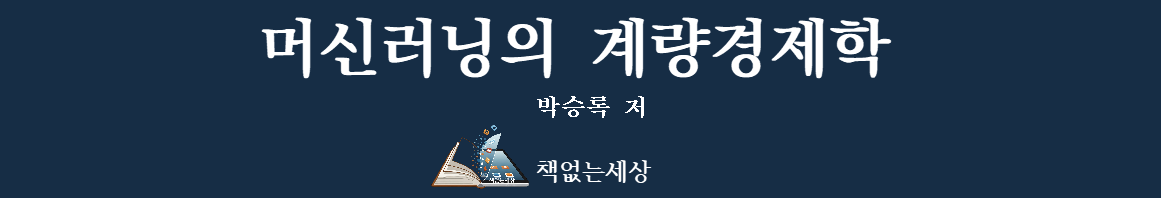

# Part 8: 머신러닝의 계량경제

## Chapter 3: 머신러닝의 자동화: Pycaret 활용

### 4. PyCaret을 이용한 다중 분류(multiple classification)

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:/Econometrics_with_ML")
os.getcwd()

'X:\\Econometrics_with_ML'

In [7]:
# 라이브러리 불러오기
exec(open('Functions/Machine Learning_Econometrics_Lib.py').read())

In [11]:
from pandas import read_csv
name = ('SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species').split()
data = read_csv('Data/iris.csv', header=None, names=name)
display(data)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### 1) 셋업(Setup)

In [10]:
# 모형의 셋업
from pycaret.classification import *
model = setup(data, target = 'Species', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [5]:
# 파라미터, 변수 리스트
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [6]:
# X_train_transformed 출력
get_config('X_train_transformed')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,5.8,2.6,4.0,1.2
61,5.9,3.0,4.2,1.5
96,5.7,2.9,4.2,1.3
148,6.2,3.4,5.4,2.3
26,5.0,3.4,1.6,0.4
...,...,...,...,...
142,5.8,2.7,5.1,1.9
146,6.3,2.5,5.0,1.9
52,6.9,3.1,4.9,1.5
31,5.4,3.4,1.5,0.4


In [7]:
# setup() 사용법
help(setup)

Help on function setup in module pycaret.classification.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, preprocess:

In [8]:
# setup()에서 변수의 정규화(minmax)
s = setup(data, target = 'Species', session_id = 12345,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,12345
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


<Axes: >

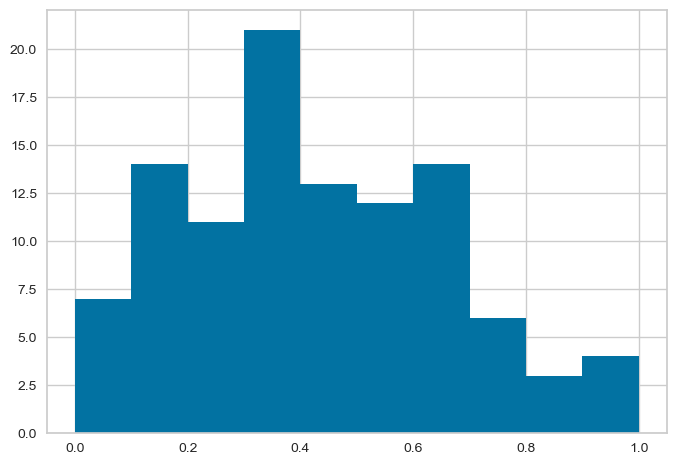

In [9]:
# X_train_transformed에서 특정변수 히스토그램
get_config('X_train_transformed')['SepalLengthCm'].hist()

<Axes: >

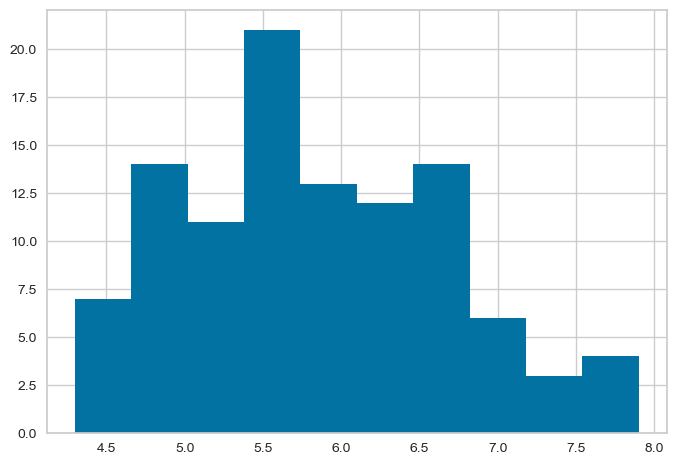

In [10]:
get_config('X_train')['SepalLengthCm'].hist()

#### 2) 모형비교(Compare Models)

In [11]:
# 2진분류 활용가능 모형
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
# 모형비교
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9779,0.9710,0.9571,0.9607,0.0130
knn,K Neighbors Classifier,0.9618,0.0000,0.9618,0.9709,0.9614,0.9426,0.9474,0.0150
qda,Quadratic Discriminant Analysis,0.9618,0.0000,0.9618,0.9704,0.9610,0.9422,0.9471,0.0150
lightgbm,Light Gradient Boosting Machine,0.9509,0.0000,0.9509,0.9622,0.9500,0.9258,0.9322,0.1710
et,Extra Trees Classifier,0.9427,0.0000,0.9427,0.9581,0.9396,0.9130,0.9221,0.0490
nb,Naive Bayes,0.9327,0.0000,0.9327,0.9501,0.9291,0.8976,0.9081,0.0130
xgboost,Extreme Gradient Boosting,0.9318,0.0000,0.9318,0.9504,0.9282,0.8977,0.9090,0.0510
rf,Random Forest Classifier,0.9227,0.0000,0.9227,0.9456,0.9183,0.8831,0.8968,0.0640
gbc,Gradient Boosting Classifier,0.9136,0.0000,0.9136,0.9383,0.9088,0.8692,0.8840,0.1000
lr,Logistic Regression,0.9027,0.0000,0.9027,0.9197,0.8966,0.8510,0.8625,1.2360


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


#### 3) 모형 생성과 평가(Create and Evaluate Model)

In [ ]:
# 로지스틱 회귀모형에 10겹 CV실행
lr = create_model('lr')
lr_results = pull()
lr_results

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8182,0.0000,0.8182,0.8788,0.7909,0.7179,0.7593
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.0000,0.8000,0.8667,0.7700,0.6875,0.7370
7,0.8000,0.0000,0.8000,0.8000,0.8000,0.6970,0.6970
8,0.8000,0.0000,0.8000,0.8000,0.8000,0.6970,0.6970


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0,0.9091,0.9318,0.9091,0.8642,0.8750
3,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8182,0.0,0.8182,0.8788,0.7909,0.7179,0.7593
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.0,0.8000,0.8667,0.7700,0.6875,0.7370
7,0.8000,0.0,0.8000,0.8000,0.8000,0.6970,0.6970
8,0.8000,0.0,0.8000,0.8000,0.8000,0.6970,0.6970


In [48]:
# create_model 활용법
help(create_model)

Help on function create_model in module pycaret.classification.functional:

create_model(estimator: Union[str, Any], fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[str] = None, verbose: bool = True, return_train_score: bool = False, **kwargs) -> Any
    This function trains and evaluates the performance of a given estimator
    using cross validation. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function. All the available models
    can be accessed using the ``models`` function.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >

In [14]:
# 모형의 평가
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

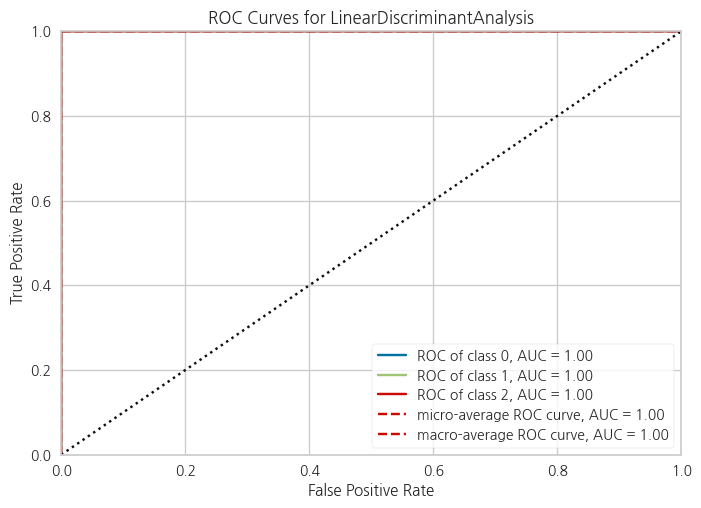

In [50]:
plot_model(best, plot = 'auc')

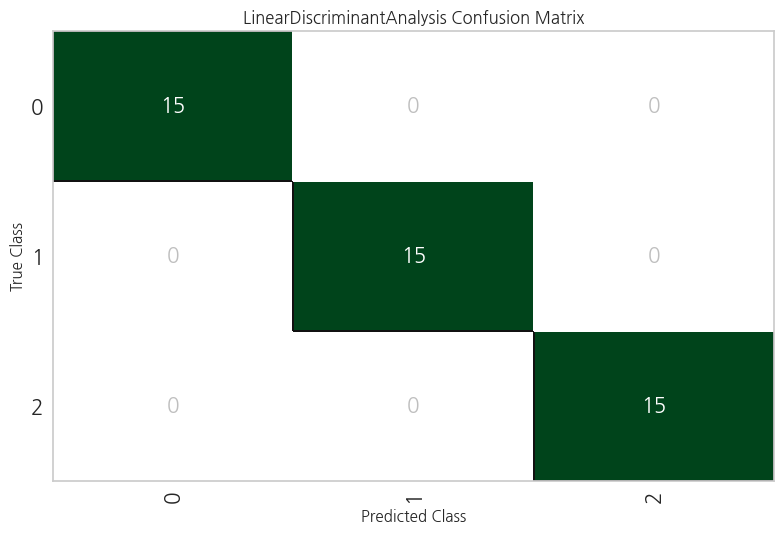

In [51]:
plot_model(best, plot = 'confusion_matrix')

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

#### 4) 모형 튜닝(Tune Model)

In [ ]:
# tune_model활용법
help(tune_model)

Help on function tune_model in module pycaret.classification.functional:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Optional[str] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs) -> Any
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected
    model based on ``optimize`` parameter. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using 

In [53]:
# dt 모형의 생성
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9051,0.8608,0.8721
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9318,0.9091,0.8642,0.8750
4,0.8182,0.0000,0.8182,0.8788,0.7909,0.7179,0.7593
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.0000,0.8000,0.8667,0.7700,0.6875,0.7370
7,0.9000,0.0000,0.9000,0.9250,0.9000,0.8507,0.8636
8,0.8000,0.0000,0.8000,0.8800,0.7917,0.7059,0.7504


In [54]:
# 모형의 hyperparameters 튜닝
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9318,0.9091,0.8642,0.8750
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.0000,0.8000,0.8667,0.7700,0.6875,0.7370
7,0.9000,0.0000,0.9000,0.9250,0.9000,0.8507,0.8636
8,0.8000,0.0000,0.8000,0.8800,0.7917,0.7059,0.7504


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [55]:
# 설정된 tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}
# 설정된 grid에 대한 튜닝(MAE 기준 평가)
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9051,0.8608,0.8721
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9318,0.9091,0.8642,0.8750
4,0.8182,0.0000,0.8182,0.8788,0.7909,0.7179,0.7593
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.0000,0.8000,0.8667,0.7700,0.6875,0.7370
7,0.9000,0.0000,0.9000,0.9250,0.9000,0.8507,0.8636
8,0.8000,0.0000,0.8000,0.8800,0.7917,0.7059,0.7504


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


####  5) 앙상블 모형(Ensemble Model)

In [ ]:
# ensemble_model 활용법
help(ensemble_model)

Help on function ensemble_model in module pycaret.classification.functional:

ensemble_model(estimator, method: str = 'Bagging', fold: Union[int, Any, NoneType] = None, n_estimators: int = 10, round: int = 4, choose_better: bool = False, optimize: str = 'Accuracy', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function ensembles a given estimator. The output of this function is
    a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> dt = create_model('d

In [57]:
# 배깅(Bagging)
ensemble_model(dt, method = 'Bagging')

# 부스팅(boosting)
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9051,0.8608,0.8721
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9318,0.9091,0.8642,0.8750
4,0.8182,0.0000,0.8182,0.8788,0.7909,0.7179,0.7593
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.0000,0.9000,0.9200,0.8956,0.8462,0.8598
7,0.9000,0.0000,0.9000,0.9250,0.9000,0.8507,0.8636
8,0.8000,0.0000,0.8000,0.8800,0.7917,0.7059,0.7504


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9051,0.8608,0.8721
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9318,0.9091,0.8642,0.8750
4,0.8182,0.0000,0.8182,0.8788,0.7909,0.7179,0.7593
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.0000,0.8000,0.8667,0.7700,0.6875,0.7370
7,0.9000,0.0000,0.9000,0.9250,0.9000,0.8507,0.8636
8,0.8000,0.0000,0.8000,0.8800,0.7917,0.7059,0.7504


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=12345,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=12345)

#### 6) 블랜딩 및 스태킹(Blend and Stacking Models)

In [ ]:
# recall기준 상위 3개 모형 선정
best_recall_models_top3 = compare_models(sort = 'recall', n_select = 3)
best_recall_models_top3

# 3개 상위모형의 블랜딩(blending top 3 models)
blend_models(best_recall_models_top3)

# blend_models 사용법
help(blend_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9779,0.9710,0.9571,0.9607,0.0120
knn,K Neighbors Classifier,0.9618,0.0000,0.9618,0.9709,0.9614,0.9426,0.9474,0.0140
qda,Quadratic Discriminant Analysis,0.9618,0.0000,0.9618,0.9704,0.9610,0.9422,0.9471,0.0120
lightgbm,Light Gradient Boosting Machine,0.9509,0.0000,0.9509,0.9622,0.9500,0.9258,0.9322,0.0960
et,Extra Trees Classifier,0.9427,0.0000,0.9427,0.9581,0.9396,0.9130,0.9221,0.0470
nb,Naive Bayes,0.9327,0.0000,0.9327,0.9501,0.9291,0.8976,0.9081,0.0130
xgboost,Extreme Gradient Boosting,0.9318,0.0000,0.9318,0.9504,0.9282,0.8977,0.9090,0.0230
rf,Random Forest Classifier,0.9227,0.0000,0.9227,0.9456,0.9183,0.8831,0.8968,0.0600
gbc,Gradient Boosting Classifier,0.9136,0.0000,0.9136,0.9383,0.9088,0.8692,0.8840,0.0970
lr,Logistic Regression,0.9027,0.0000,0.9027,0.9197,0.8966,0.8510,0.8625,0.0140


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9318,0.9091,0.8642,0.8750
4,0.9091,0.0000,0.9091,0.9273,0.9051,0.8608,0.8721
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.0000,0.9000,0.9200,0.8956,0.8462,0.8598
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Help on function blend_models in module pycaret.classification.functional:

blend_models(estimator_list: list, fold: Union[int, Any, NoneType] = None, round: int = 4, choose_better: bool = False, optimize: str = 'Accuracy', method: str = 'auto', weights: Optional[List[float]] = None, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function trains a Soft Voting / Majority Rule classifier for select
    models passed in the ``estimator_list`` param. The output of this function
    is a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classificatio

In [59]:
# 스태깅 모형(stacking models)
stack_models(best_recall_models_top3)
help(stack_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9091,0.9318,0.9091,0.8642,0.8750
4,0.9091,0.0000,0.9091,0.9273,0.9051,0.8608,0.8721
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.0000,0.9000,0.9200,0.8956,0.8462,0.8598
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Help on function stack_models in module pycaret.classification.functional:

stack_models(estimator_list: list, meta_model=None, meta_model_fold: Union[int, Any, NoneType] = 5, fold: Union[int, Any, NoneType] = None, round: int = 4, method: str = 'auto', restack: bool = False, choose_better: bool = False, optimize: str = 'Accuracy', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function trains a meta model over select estimators passed in
    the ``estimator_list`` parameter. The output of this function is a
    score grid with CV scores by fold. Metrics evaluated during CV can
    be accessed using the ``get_metrics`` function. Custom metrics
    can be added or removed using ``add_metric`` and ``remove_metric``
    function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')


#### 7) 예측(Prediction)

In [ ]:
# 테스트 데이터에 대한 예측
predict_model(best)

# 임의의 데이터에 대한 예측
predictions = predict_model(best, data=data)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9800,0.9993,0.9800,0.9801,0.9800,0.9700,0.9701


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prediction_label,prediction_score
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,1.0000
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,1.0000
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,1.0000
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,1.0000
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,1.0000
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,1.0000
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,0.9984
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,0.9981
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,1.0000


#### 8) 모형 저장과 로딩(Save and Load Model)

In [ ]:
# save model
save_model(best, './Output/Model_iris')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SepalLengthCm', 'SepalWidthCm',
                                              'PetalLengthCm', 'PetalWidthCm'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('normalize',
     

In [30]:
# load model
loaded_from_disk = load_model('./Output/Model_iris')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\PARKSE~1\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Id', 'SepalLengthCm',
                                             'SepalWidthCm', 'PetalLengthCm',
                                             'PetalWidthCm'],
                                    transformer=SimpleImputer(add...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=12345,
                                        splitter='best'))],
         verbose=False)